## Resume Parser using NLP (Spacy) and Machine Learning

steps:
1.   Installing and Importing all the necessary Libraries
2.   Importing Dataset
3.   Downloading & Loading Spacy Model
4.   Entity Ruler
5.   Functions get_skills & unique_skills
6.   Cleaning Resume Text
7.   Applying Functions 
8.   Vizualization & Data Exploration 
9.   Finding Most Used Words
10.  Entity Recognition
11.  Custom Entity Recognition
12.  My Resume Analysis for Parsing 
     * Extracting mobile number
     * Extracting Email ID
     * Extracting skills
13.  Resume Parsing Posibility Score based on Skill




**step1: Installing and Importing all the necessary Libraries**

In [7]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [1]:
!pip install jsonlines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# !pip uninstall gensim

In [4]:
# pip install -U gensim
# !python -m pip install -U gensim

In [5]:
# !pip install --upgrade numpy

In [2]:
#spacy
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc

#gensim
import gensim
from gensim import corpora

#Visualization
from spacy import displacy
import pyLDAvis
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

#Data loading/ Data manipulation
import pandas as pd
import numpy as np
import jsonlines

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#warning
import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**step 2: Importing Dataset**

In [3]:
resume_csv_path = "/content/drive/MyDrive/Colab Notebooks/Task 3 Code Clause Internship /Resume.csv"
df = pd.read_csv(resume_csv_path)
df = df.reindex(np.random.permutation(df.index))
data = df.copy().iloc[0:200,]
data.head()

,ID,Resume_str,Resume_html,Category
1506,57088974,FINANCE MANAGER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE
869,62870550,CUSTOMER CARE REPRESENTATIVE Pr...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS
2404,15618327,LEAN SIX SIGMA BLACK BELT Sum...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
1225,13837784,DIGITAL MEDIA BUYER Professio...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA
705,18714571,CNA IN SKILLED HEALTHCARE Profe...,"<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE


**Step 3: Downloading & Loading Spacy Model**

In [4]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [5]:
!python -m spacy download en_core_web_lg


2023-05-22 08:11:25.436240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [6]:
nlp = spacy.load("en_core_web_lg")
skill_pattern_path = "/content/drive/MyDrive/Colab Notebooks/Task 3 Code Clause Internship /jz_skill_patterns.jsonl"


**step 4: Entity Ruler**

In [7]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

**step 5: Functions get_skills & unique_skills**

In [8]:
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_skills(x):
    return list(set(x))

**step 6: Cleaning Resume Text**

In [9]:
clean = []
for i in range(data.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        data["Resume_str"].iloc[i],
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    clean.append(review)

**step 7: Applying Functions**

In [10]:
data["Clean_Resume"] = clean
data["skills"] = data["Clean_Resume"].str.lower().apply(get_skills)
data["skills"] = data["skills"].apply(unique_skills)
data.head()

,ID,Resume_str,Resume_html,Category,Clean_Resume,skills
1506,57088974,FINANCE MANAGER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",FINANCE,finance manager summary flexible accountant ad...,"[accounting, schedule, design, software, secur..."
869,62870550,CUSTOMER CARE REPRESENTATIVE Pr...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS,customer care representative professional summ...,"[accounting, schedule, medium, software, docum..."
2404,15618327,LEAN SIX SIGMA BLACK BELT Sum...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,lean six sigma black belt summary highly skill...,"[accounting, deployment, data processing, mobi..."
1225,13837784,DIGITAL MEDIA BUYER Professio...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,digital medium buyer professional summary vers...,"[search engine, google analytics, medium, word..."
705,18714571,CNA IN SKILLED HEALTHCARE Profe...,"<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE,cna skilled healthcare professional background...,"[design, documentation]"


**step 8: Vizualization & Data Exploration**

In [11]:
fig = px.histogram(
    data, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [12]:

Job_cat = data["Category"].unique()
Job_cat = np.append(Job_cat, "ALL")

In [13]:
Job_Category = "AVIATION"

In [14]:
Total_skills = []
if Job_Category != "ALL":
    fltr = data[data["Category"] == Job_Category]["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)
else:
    fltr = data["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)

fig = px.histogram(
    x=Total_skills,
    labels={"x": "Skills"},
    title=f"{Job_Category} Distribution of Skills",
).update_xaxes(categoryorder="total descending")
fig.show()

**step 9: Finding Most Used Words**

Text(0.5, 1.0, 'Most Used Words in AVIATION Resume')

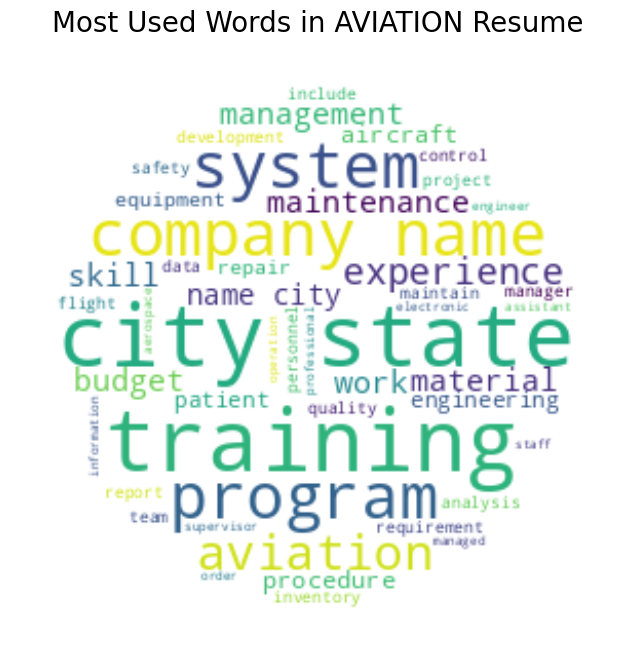

In [15]:
text = ""
for i in data[data["Category"] == Job_Category]["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in {Job_Category} Resume", fontsize=20)

**step 10: Entity Recognition**

In [16]:
sent = nlp(data["Resume_str"].iloc[0])
displacy.render(sent, style="ent", jupyter=True)

**step 11: Custom Entity Recognition**

In [17]:
patterns = df.Category.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-Category", "pattern": a}])

In [18]:
# options=[{"ents": "Job-Category", "colors": "#ff3232"},{"ents": "SKILL", "colors": "#56c426"}]
colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(data["Resume_str"].iloc[5])
displacy.render(sent, style="ent", jupyter=True, options=options)

**step 12: My Resume Analysis for Parsing**

In [19]:
input_resume=''' hetvibhora19@gmail.com
 9313116452
 Navsari, Gujarat, India
 https://github.com/hetvi-1905

Ms. Hetvi Bhora

AI - ML - Data Science Enthusiast

 linkedin.com/in/hetvi-bhora-b73023221

OBJECTIVE
To Learn New & Innovative technologies & Challenge myself everyday!

EDUCATION
Jul '20 - Present

B.E Information Technology (pursuing) (2022 -24) | G H
PATEL College Of Engineering & Technology , Anand
CPI : 9.42 / 10 ( Till semester 5) | Secured 1st rank in semester 2 , semester 4 , semester 5

Mar '20

XII (State Board) | AB English High School , Navsari
Percentile: 95.19

Mar '18

X (State Board) | Sir J J High School , Navsari
Percentile: 99.64

EXPERIENCE
Mar '23

Machine Learning Intern
Suven Consultants, India
Worked on projects related to machine learning and deep learning and implemented the knowledge in various projects thereafter.

Machine Learning Intern
Feynns Lab Services, Assam, India

Dec '22 - Feb '23

Working on several projects related to AI product/service Prototyping, Market Segmentation using Machine Learning and Data Analysis, AI Product/Service
Business and Financial Modelling

Full Stack Developer
MyEplatform, Maharashtra , India

Aug '22 - Nov '22

Worked on various technologies like HTML, CSS , JavaScript, Bootstrap, Angular for front-end and PHP for back-end and developed website through these
technologies and tools.

PROJECTS
Malicious URL Detector | Dec 2022
Python, Flask, Numpy, Pandas, Scikit-learn, Beautiful-soup
code: https://github.com/hetvi-1905/Malicious-url-detector-19
Email Generator | Sept 2022
GPT3,OpenAI API, Numpy, Pandas, Streamlit, Flask
code : https://github.com/hetvi-1905/EmailGenerator19
Hospital Management System | Sept 2022
HTML , CSS , JavaScript , PHP , PhpMyAdmin
code : https://github.com/hetvi-1905/Hospital_Management_System
Car Brand Image Classification | Aug 2022
Deep Learning , CNN , Tensorflow , Resnet50 , Flask
code : https://github.com/hetvi-1905/Car-Brand-Image-Classification


Email Spam Detector | Aug 2022
Natural Language Processing , NLTK , TF-IDF , Vectorization , Streamlit
code : https://github.com/hetvi-1905/Spam_Email_Detection
Movie Recommendation System | July 2022
NLP , Text-Preprocessing , Cosine-similarity
code : https://github.com/hetvi-1905/Movie_Recommendation_System19
Heart Disease Prediction | June 2022
Machine Learning , Binary Classification , Flask
code : https://github.com/hetvi-1905/Heart_Disease_Prediction19
Car Selling Price Prediction | June 2022
Machine Learning , Regression , Flask
code: https://github.com/hetvi-1905/Car_Selling_Price_Prediction

KEY SKILLS
Creative Thinking
Problem Solving Abilities
Analytical Thinking
Communication Skills

TECHNICAL SKILLS
AI TECHNOLOGIES
•Machine Learning • Deep Learning • Image Processing • Computer Vision
MACHINE LEARNING
•Tensorflow • Pytorch • Keras •Scikit Learn • Numpy • Pandas • Matplotlib •Seaborn
WEB DEVELOPMENT
•HTML • CSS • Bootstrap •Node.js •React.js •Angular.js
Databases
• MySQL • PhpMyAdmin
PROGRAMMING LANGUAGES
•Python • C++ • C • JavaScript • Java • PHP
OPERATING SYSTEMS
•Linux • Windows
MISCELLANEOUS
• git • GitHub

VOLUNTEERING EXPERIENCE
International Society of Automation | Technical Head | Oct 2022 - present
Indian Society of Technical Education | Technical Head | July 2022 - present
Code Of Duty Event - Imaze 2022 | Volunteer | April 2022


CERTIFICATION
Programming for Everybody ( Getting Started with Python) | University of Michigan
link : https://www.coursera.org/account/accomplishments/certificate/5ZJKLTQ36QHA
Introduction to Data Science in Python | University of Michigan
link : https://www.coursera.org/account/accomplishments/certificate/F7JKT2Z4A6VX
Exploratory Data Analysis for Machine Learning with Honors | IBM
link : https://www.coursera.org/account/accomplishments/certificate/LL7BZDD8EJE9
Supervised Machine Learning : Regression | IBM
link : https://www.coursera.org/account/accomplishments/certificate/ZQXGLK8YPSSM
Supervise Machine Learning : Classification | IBM
link : https://www.coursera.org/account/accomplishments/certificate/Q2KDN5H24LD8
Introduction to Artificial Intelligence (AI) | IBM
link : https://www.coursera.org/account/accomplishments/certificate/DDRJKLYMTGGR

LANGUAGES
English | Full Professional Proficiency
Hindi | National Language , Full Professional Proficiency
Gujarati | Native Tongue, Full Professional Proficiency


'''

In [20]:
sent2 = nlp(input_resume)
displacy.render(sent2, style="ent", jupyter=True, options=options)

In [21]:
import re

def extract_mobile_number(text):
    phone = re.findall(re.compile(r'\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}'), text)
    
    if phone:
        number = ''.join(phone[0])
        if len(number) > 10:
            return '+' + number
        else:
            return number

In [22]:
x = extract_mobile_number(input_resume)
print(x)

9313116452


In [23]:
import re

def extract_email(email):
    email = re.findall("([^@|\s]+@[^@]+\.[^@|\s]+)", email)
    if email:
        try:
            return email[0].split()[0].strip(';')
        except IndexError:
            return None



In [24]:
y = extract_email(input_resume)
print(y)

hetvibhora19@gmail.com


In [25]:
resume_skills = unique_skills(get_skills(input_resume.lower()))

print(resume_skills)

['pytorch', 'artificial intelligence', 'computer vision', 'databases', 'ml', 'python', 'natural language processing', 'languages', 'deep learning', 'windows', 'data science', 'image processing', 'javascript', 'business', 'ai', 'bootstrap', 'numpy', 'exploratory data analysis', 'data analysis', 'git', 'flask', 'pandas', 'mysql', 'segmentation', 'operating systems', 'nlp', 'machine learning', 'java', 'tensorflow', 'keras', 'github', 'angular']


**step 13: Resume Parsing Posibility Score based on Skills**

In [26]:
print(resume_skills)

['pytorch', 'artificial intelligence', 'computer vision', 'databases', 'ml', 'python', 'natural language processing', 'languages', 'deep learning', 'windows', 'data science', 'image processing', 'javascript', 'business', 'ai', 'bootstrap', 'numpy', 'exploratory data analysis', 'data analysis', 'git', 'flask', 'pandas', 'mysql', 'segmentation', 'operating systems', 'nlp', 'machine learning', 'java', 'tensorflow', 'keras', 'github', 'angular']


In [27]:
input_skills = "Data Science,Data Analysis,Database,SQL,Machine Learning,tableau"

In [28]:
req_skills = input_skills.lower().split(",")
resume_skills = unique_skills(get_skills(input_resume.lower()))
score = 0
for x in req_skills:
    if x in resume_skills:
        score += 1
req_skills_len = len(req_skills)
match = round(score / req_skills_len * 100, 1)

print(f"The current Resume is {match}% matched to your requirements")

The current Resume is 50.0% matched to your requirements
